**AUTHOR:**  

**Nabiel Husein Shihab**   
- email: nabielshihab@hotmail.com  
- Linkedin: https://www.linkedin.com/in/nabiel-shihab/    
- GitHub: https://github.com/nabielshihab 

**Import Packages / Libraries**  
It is a common practice to import all necessary packages and place user-defined functions at the beginning of the file.

In [1]:
# user-defined packages
from packages.eda import *
from packages.evaluation import *

# for machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# dataframe display
pd.set_option('max_columns', None)
pd.set_option("display.precision", 3)

**User-defined Functions**

In [2]:
def check_portion(df, column, **kwargs):
    """
    Show the number and the portion of each value in a column.

    Parameters
    ---------
    df : {dataframe} a pandas dataframe
    column : {str} column name
    **kwargs : plotting keyword arguments
    """
    # plot number of samples in each status category 
    df[column].value_counts().plot(kind='bar', ylabel='Num. of Samples', **kwargs)

    # the percentage of each loan status
    # keep in mind that `display` method only applicable on a jupyter notebook.
    display(pd.DataFrame({'# Samples': df[column].value_counts(), 
                  'Percentage': df[column].value_counts() / df.shape[0] * 100}))
    

def show_null_containings(df):
    """
    Show the number and the portion of null values in each column in descending order.
    Only null-containing columns are shown. 
    
    Parameter
    ---------
    df : {dataframe} a pandas dataframe
    """
    df_null = pd.DataFrame(df.isna().sum(), columns=['Percentage of Nulls'])
    df_null['Percentage of Nulls'] = df_null / df.shape[0] * 100
    
    
    display(df_null[df_null['Percentage of Nulls'] > 0].sort_values('Percentage of Nulls', ascending=False))
    
    
def show_one_unique_containings(df):
    """
    Show the list of features which contain only one unique value.
    
    Parameter
    ---------
    df : {dataframe} a pandas dataframe
    """
    cols = df.nunique().sort_values()
    cols = cols[cols==1]

    display(pd.DataFrame(cols, columns=['Num of Unique Values']))

# The Problem Statement

**The Goal**  
A lending company that we are partnering with wanted us to **predict credit risk.**

**Why is it important?**  
Because it could tell lenders and other creditors whether a loan will end up being fully paid or charged off. Therefore, these predictions would be very useful to investors in determining whether or not to invest.  

# The Analytical Approaches

As the goal requires us to make some predictions, we need to approach it using **predictive analytics**. In other words, we are going to deal with a machine learning model, or models(?) However, it does not mean that we will not take other approaches into account. For example, we can still perform some descriptive analytics to help us gain knowledge about the data.

# The Data

We have a CSV-formatted dataset. It comprises the funded loans data only since they did not provide us the rejected loans dataset. There are columns related to identification numbers, some are related to the borrower / co-borrowers' personal information, some are loan-specific, some columns related to the borrower / co-borrowers' credit / public records, and other columns.

## Data Loading

It's time to read the CSV-formated loan dataset.

In [3]:
# read the dataset
df = pd.read_csv('dataset/loan_data_2007_2014.csv')

As we have loaded our data, it is better to observe it at a high level. We can use the ***`pandas' info`*** method to obtain some information about it.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

> From the dataframe and the info above, we can see that:
> - we have got **466,285 samples (rows)** and **75 features (columns)** in our dataset,   
> - we have multiple types of data, and  
> - there are many columns consist of null values

To get a better understanding about the features, we can read the data dictionary below.

## Data Dictionary

The descriptions of the variables are taken from the data dictionary from the Lending Club. Here is the list of the descriptions.

**Columns that are related to IDs**  
> - `id` :  A unique LC assigned ID for the loan listing.
> - `member_id` : A unique LC assigned Id for the borrower member.

**Columns related to the borrower / co-borrowers' personal information**
> - `emp_title` : The job title supplied by the borrower when applying for the loan. 
> - `emp_length` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. In the dataset, we have 10 classifications (excluding nan), namely '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'.
> - `home_ownership` : The home ownership status provided by the borrower during registration. 
> - `annual_inc` : The self-reported annual income provided by the borrower during registration.
> - `zip_code` : The first 3 numbers of the zip code provided by the borrower in the loan application.
> - `addr_state` : The state provided by the borrower in the loan application.
> - `annual_inc_joint` : The combined self-reported annual income provided by the co-borrowers during registration.  

**Columns that are loan-specific**
> - `loan_amnt` : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
> - `funded_amnt` : The total amount commited to that loan at that point in time.
> - `funded_amnt_inv` : The total amount commited by investors for that loan at that point in time.
> - `term` : The number of payments on the loan. Values are in months and can be either 36 or 60.
> - `int_rate` : interest rate on the loan.
> - `installment` : The monthly payment owed by the borrower if the loan originates.
> - `grade` : LC assigned loan grade.  
> - `sub_grade` : LC assigned loan subgrade.  
> - `issue_d` : The month which the loan was funded.  
> - `loan_status` : The current status of the loan.  
> - `pymnt_plan` : Indicates if a payment plan has been put in place for the loan  
> - `url` : URL for the LC page with listing data.  
> - `desc` : Loan description provided by the borrower.  
> - `purpose` : A category provided by the borrower for the loan request.  
> - `title` : The loan title provided by the borrower.  
> - `initial_list_status` : The initial listing status of the loan. Possible values are – W, F.  
> - `out_prncp` : Remaining outstanding principal for total amount funded.  
> - `out_prncp_inv` : Remaining outstanding principal for portion of total amount funded by investors.
> - `total_pymnt` : Payments received to date for total amount funded.  
> - `total_pymnt_inv` : Payments received to date for portion of total amount funded by investors.  
> - `total_rec_prncp` : Principal received to date.    
> - `total_rec_int` : Interest received to date.  
> - `total_rec_late_fee` :  late fees received to date.   
> - `recoveries` : post charge off recoveries.  
> - `collection_recovery_fee` : post charge off collection fee.  
> - `last_pymnt_d` : Last month payment was received.
> - `last_pymnt_amnt` : Last total payment received.
> - `next_pymnt_d` : Next scheduled payment date.  
> - `last_credit_pull_d` : The most recent month LC pulled credit for this loan.  
> - `application_type` : Indicates whether the loan is an individual application or a joint application with two co-borrowers.  


**Columns related to the borrower / co-borrowers' credit / public records**  
> - `verification_status` : Indicates if income was verified by LC, not verified, or if the income source was verified.   
> - `dti` : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
> - `dti_joint` : A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.  
> - `verification_status_joint` : Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified.   
> - `delinq_2yrs` : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.  
> - `earliest_cr_line` : The month the borrower's earliest reported credit line was opened.  
> - `inq_last_6mths` : The number of inquiries in past 6 months (excluding auto and mortgage inquiries).  
> - `mths_since_last_delinq` : The number of months since the borrower’s last delinquency.  
> - `mths_since_last_record` : The number of months since the last public record.  
> - `open_acc` : The number of open credit lines in the borrower's credit file.  
> - `pub_rec` : The number of derogatory public records. A derogatory public record is a type of negative item on your credit report. The higher the number, the lower the borrower's credit score.  
> - `revol_bal` : Total credit revolving balance.  
> - `revol_util` : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  
> - `total_acc` : The total number of credit lines currently in the borrower's credit file.  
> - `collections_12_mths_ex_med` : Number of collections in 12 months excluding medical collections.  
> - `mths_since_last_major_derog` : Months since most recent 90-day or worse rating.
> - `acc_now_delinq` : The number of accounts on which the borrower is now delinquent.  
> - `total_col_amnt` : The total collection amounts ever owed.   
> - `total_cur_bal` : The total current balance of all accounts.  
> - `open_acc_6m` : The number of open trades in the last 6 months.  
> - `open_il_6m` : The number of currently active installment trades.  
> - `open_il_12m` : The number of installment accounts opened in the past 12 months.  
> - `open_il_24m` : The number of installment accounts opened in the past 24 months.  
> - `mths_since_rcnt_il` : Months since most recent installment accounts opened.  
> - `total_bal_il` : The total current balance of all installment accounts.   
> - `il_util` : The ratio of total current balance to high credit/credit limit on all install acct.
> - `open_rv_12m`: The number of revolving trades opened in the past 12 months.
> - `open_rv_24m`: The number of revolving trades opened in the past 24 months.  
> - `max_bal_acc`: The maximum current balance owed on all revolving accounts.  
> - `all_util` : The balance to credit limit on all trades.  
> - `total_rev_hi_lim` : The total revolving high credit/credit limit.  
> - `inq_fi` : The number of personal finance inquiries.  
> - `total_cu_tl` : The number of finance trades.
> - `inq_last_12m` : The number of credit inquiries in the last 12 months.

**Others**
> - `Unnamed: 0` : The row-index information.
> - `policy_code` : Publicly available policy_code=1. New products not publicly available policy_code=2.  

# Data Preparation

We need to ensure that our data is clean and is in a suitable form so our logic is provided with usable data. No matter how good our logic is, if the input data is incorrect, the results will not be reliable! Just like George Fuechsel, an early IBM programmer and instructor, said  
*`"Garbage In, Garbage Out!"`*

Here is the list of some potential issues that we need to consider:
- unnecessary samples
- duplicate rows (if any)
- unrelevant / unusable features (feature selection)
- incorrect data types
- bad-formatted values
- categorical variables
- incomplete yet useful features

apart from them, we can also add new features in this step.

## Drop Unnecessary Samples

The first thing to do when we are cleaning our data is to make sure that we are working with correct samples. 

Our goal is to predict credit risk. In other words, we need to predict whether the approved loan will end up being fully paid or charged off. Yet, we can see that there are other loan status categories beside those two. 

,# Samples,Percentage
Current,224226,48.088
Fully Paid,184739,39.619
Charged Off,42475,9.109
Late (31-120 days),6900,1.480
In Grace Period,3146,0.675
Does not meet the credit policy. Status:Fully Paid,1988,0.426
Late (16-30 days),1218,0.261
Default,832,0.178
Does not meet the credit policy. Status:Charged Off,761,0.163


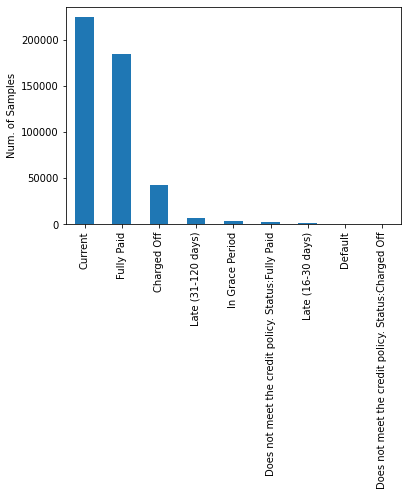

In [5]:
# show the categories of loan_status
check_portion(df, 'loan_status')

We can see that the majority of loans are still in progress. However, we should focus on the completed loans (i.e., none that are still in progress, whether current or in default, since we don’t know the final outcome of these loans). Therefore, our categories of interest would only be the Fully Paid and the Charged Off categories. They will be our target feature / label when we train our machine learning models. Note that there are some loans that are either fully paid or charged off but they do not meet the credit policy. We will not use them because they could mislead us. Why? because it is sort of ambiguous when it is a fully paid loan, which might lower the risk, but it does not meet the credit policy, which might increase the risk. In addition, they have only less than 1% of the data in total, so it would not be a big deal.

In [6]:
# keep only Fully Paid and Charged Off loans
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

**Check the current number of samples**  
It is important to know the number of samples before we carry out any analyses.

In [7]:
print(f'Current num. of samples: {df.shape[0]:,}')

Current num. of samples: 227,214


**Check the percentage of each Label**  
It is also important to check the portion of each label.

,# Samples,Percentage
Fully Paid,184739,81.306
Charged Off,42475,18.694


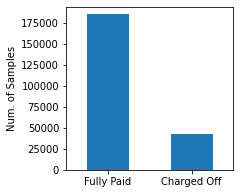

In [8]:
check_portion(df, 'loan_status', figsize=(3,3), rot=0)

Here we can see that we have a moderate degree of imbalanced dataset, i.e. the proportion of the minority class is within the range of 1-20% of the data set. We need to consider this when we create our model.

## Find out Duplicates

Now, we will sort out any duplicates, if any. We can use ***`pandas' duplicated`*** method to find them.

In [9]:
# find duplicate rows
print('# duplicate rows:', df[df.duplicated()].shape[0]) 

# duplicate rows: 0


It seems that we don't have any duplicate rows.  
But still, we need to worry whether there are duplicate member IDs since one person is not allowed to have more than one IDs.

In [10]:
# find duplicate rows (subset member_id)
print('# duplicate member IDs:', df[df[["member_id"]].duplicated()].shape[0]) 

# duplicate member IDs: 0


Yeah, we don't need to worry about duplicates!

## Feature Selection

At this point, we will keep / drop some features based on:
- the relevancy to our target feature
- the possibility of a data leakage
- the practicability
- the number of non-null values
- the number of unique values
- the relationship with other features

**Unrelevant Features**  

We classify features as unrelevant when we know that they have nothing to do with the target feature. Thus, they will not have any contribution when it comes to making predictions. That is why we should exclude them. Here is the list of those features:

- `Unnamed: 0`
- `id` 
- `member_id` 
- `url`

The first feature only represents the row-index, while those last three features only represent the lending club’s borrower identification. Apart from them, the `initial_list_status` represents whether the lender provided the entire loan (W) or if the loan is across multiple lenders (F). Thus, it has nothing to do with the borrowers' ability / willingness to pay the loan.

**Data-leakage-leading Features**  

Some features which will not be existed when the loan has not been issued could lead us to data leakage. For example, `recoveries` and `collection_recovery_fee` are related to charged-off loans only and they won't be available at the time of the funding decision. In consequence, our model would easily predict loans with `recoveries` value of 0 as a 'Fully Paid' loans. But, all loans will have `recoveries` value of 0 at the beginning. Therefore, we need to exclude those kind of features. Here is the list of them:

- `recoveries` 
- `collection_recovery_fee`
- `funded_amnt`
- `funded_amnt_inv`
- `last_pymnt_amnt`
- `total_pymnt`
- `total_pymnt_inv`
- `total_rec_int`
- `total_rec_late_fee`
- `total_rec_prncp`
- `last_pymnt_d`
- `last_credit_pull_d`

**Impractical Features**  

The `emp_title` & `title` features will be excluded because of their impracticability, even though some roles are paid higher than the others and some companies pay higher than the others and they could affect the credit risk assessment. However, these columns have way too many unique texts without clear classifications. Thus, they will not be usable for our further analyses. In addition, we already have the annual income information in the dataset. For the same reason, we will also drop the `desc` column. Moreover, the LC has provided other columns that is related to this information.


**Null-containing Features**  

Now, we will observe the number of NaN (null) values in each column. It would be easier to show only the null-containing columns and their associated number as well as the portion of null values, and sort them in descending order. 

In [11]:
# show null-containing columns
show_null_containings(df)

,Percentage of Nulls
inq_last_12m,100.000
annual_inc_joint,100.000
mths_since_rcnt_il,100.000
open_il_24m,100.000
open_il_12m,100.000
open_il_6m,100.000
open_acc_6m,100.000
open_rv_12m,100.000
open_rv_24m,100.000
verification_status_joint,100.000


For now, we will drop those columns which have null values of 100%. We will work on the remaining null-containing columns later on.   
That said, we will drop these 18 features:  

- `inq_last_12m` 
- `il_util` 
- `annual_inc_joint` 
- `open_acc_6m` 
- `open_il_6m` 
- `open_il_12m` 
- `open_il_24m` 
- `mths_since_rcnt_il`
- `verification_status_joint`
- `total_bal_il`
- `open_rv_12m`
- `open_rv_24m`
- `max_bal_bc`
- `all_util`
- `next_pymnt_d`
- `inq_fi`
- `total_cu_tl`
- `dti_joint` 

**One-unique-containing Features**  

Features with only one unique value cannot be analyzed and will not be useful when it comes to building a model. Those features are listed below.  

In [12]:
show_one_unique_containings(df)

,Num of Unique Values
out_prncp_inv,1
application_type,1
policy_code,1
out_prncp,1


In addition, `pymnt_plan` is extremely unproportional. Almost all values in this column are 'n'. Only 2 samples are 'y'. We will drop it as well.

In [13]:
df['pymnt_plan'].value_counts()

n    227212
y         2
Name: pymnt_plan, dtype: int64

**Drop Features**  
Now, it's time to drop the unnecessary features.

In [14]:
# list of columns to drop
cols_to_drop = [
    # unrelevant
    'Unnamed: 0', 
    'id',
    'member_id',
    'url',
    'initial_list_status',
    # potentialy misleading
    'recoveries', 
    'collection_recovery_fee',
    'funded_amnt',
    'funded_amnt_inv',
    'last_pymnt_amnt',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp',
    'last_pymnt_d',
    'last_credit_pull_d',
    # impractical
    'emp_title',
    'title',
    'desc',
    # null-containing
    'inq_last_12m', 
    'il_util', 
    'annual_inc_joint', 
    'open_acc_6m', 
    'open_il_6m', 
    'open_il_12m', 
    'open_il_24m', 
    'mths_since_rcnt_il', 
    'verification_status_joint', 
    'total_bal_il', 
    'open_rv_12m', 
    'open_rv_24m', 
    'max_bal_bc', 
    'all_util', 
    'next_pymnt_d', 
    'inq_fi', 
    'total_cu_tl', 
    'dti_joint',
    # one-unique-containing / extremely unproportional
    'policy_code', 
    'application_type', 
    'out_prncp', 
    'out_prncp_inv', 
    'pymnt_plan',
]

# drop those columns
df = df.drop(cols_to_drop, axis=1)

**Highly Correlated Features**  

One of the best ways to figure out the correlation between variables is using the correlation matrix. Now, let's extract pairs of features which have correlation coefficient greater than or equal to the desired threshold (absolute 0.8).

,feature_1,feature_2,CC
0,loan_amnt,installment,0.956
1,revol_bal,total_rev_hi_lim,0.827


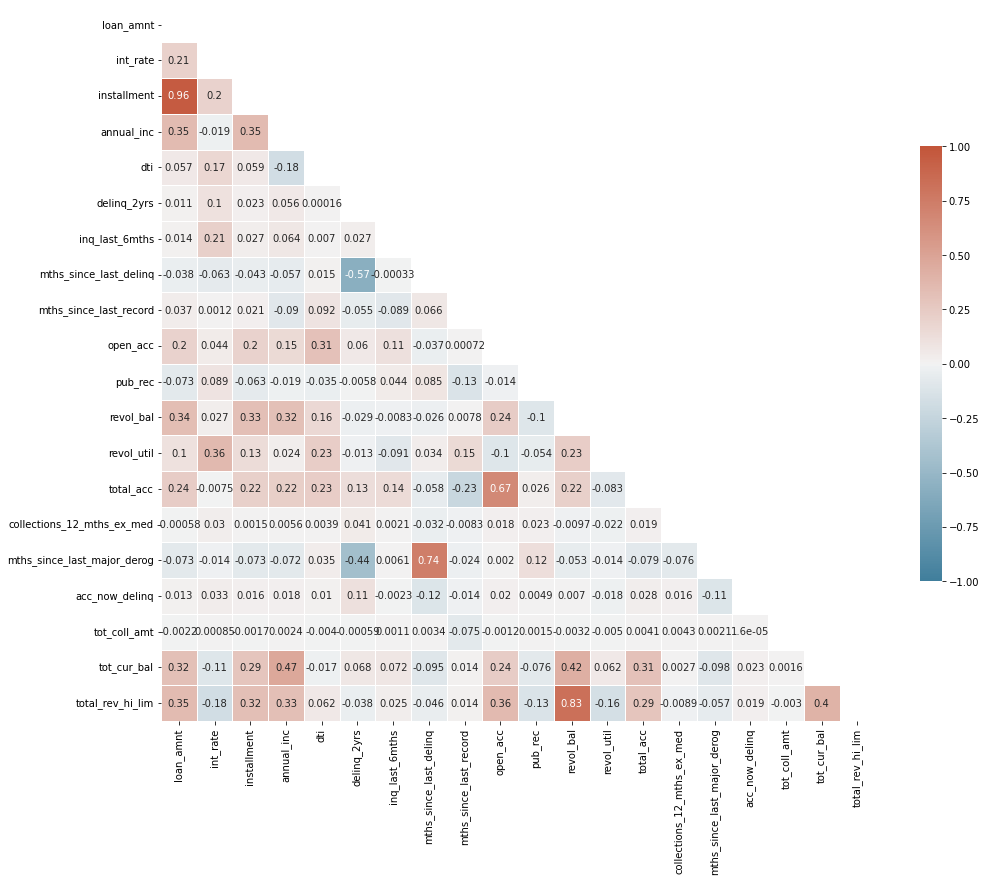

In [15]:
# CC threshold
threshold = .8

# correlation matrix dataframe
corrMatrix = df.drop('loan_status', axis=1).corr()

# plot correlation matrix
plot_corr_matrix(corrMatrix, annot=True, figsize=(16,16))

# highly correlated features
df_highcorr = high_cc_features(corrMatrix, threshold)
df_highcorr

It seems that we have some highly correlated features. 
- The `loan_amnt` and `installment` columns :  strong positive correlation (CC of 0.96). 
- The `revol_bal` and `total_rev_hi_lim` columns :  strong positive correlation (CC of 0.83).  

We will drop the `installment` and the `total_rev_hi_lim` columns. Moreover, the `sub_grade` column will be removed since we have already had the `grade` column. We determined to continue with the `grade` instead of the `sub_grade` column because the `grade` column has fewer number of categories. Thus, when we encode it using One-hot encoder, we will not get too many dummy features.

In [16]:
# list of columns to drop
cols_to_drop = [
    # highly correlated features
    'installment',
    'total_rev_hi_lim',
    'sub_grade',
]

# drop the highly correlated features
df = df.drop(cols_to_drop, axis=1)

## Tidy Up some Features

Before we handle the incomplete yet useful features, we have to tidy up some features. Some features have incorrect data types, some are categorical and need to be encoded, some have bad-formatted values

**Fix data type**  
We need to convert the data types of the `issue_d` and `earliest_cr_line` columns from python object (str in this context) to datetime.

In [17]:
# convert to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

WARNING! Function `strptime` can  parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068. Source: https://docs.python.org/3/library/time.html

Let's see how it affects our data!

In [18]:
# check the years
df['issue_d'].dt.year.sort_values()

39564     2007
39626     2007
39625     2007
39624     2007
39623     2007
          ... 
332878    2014
332881    2014
332889    2014
332799    2014
466283    2014
Name: issue_d, Length: 227214, dtype: int64

In [19]:
# check the years
df['earliest_cr_line'].dt.year.sort_values()

26618     1969
65822     1969
352922    1969
363191    1969
441231    1969
          ... 
226177    2068
108980    2068
108639    2068
156943    2068
296362    2068
Name: earliest_cr_line, Length: 227214, dtype: int64

As we expected, it seems that we have got some data from the future in the `earliest_cr_line`.  
Let's send them back to their true century of origin!

In [20]:
# extract the years, months, and days
years = df['earliest_cr_line'].dt.year
months = df['earliest_cr_line'].dt.month
days = df['earliest_cr_line'].dt.day

# subtract the years with 100
years[years>2011] = years[years>2011]-100

# update the dataframe
df['earliest_cr_line'] = pd.to_datetime(pd.DataFrame({'year':years, 'month':months, 'day':days}))

**Encode categorical variables**  
For the algorithm's sake, we need to encode some variables using LabelEncoder (if they have ordinal values), while the others using OneHotEncoder. In addition, we will manually label-encode the `emp_length` column. For EDA visualization, we will preserve the original columns. But, we will drop them when building machine learning models.  
Here is the list of the features and their associated encoding methods:
- Label encoding : `term` , `grade`, `emp_length`
- One-hot encoding : `home_ownership`, `verification_status`, `purpose`

In [21]:
# Label encoding
le = preprocessing.LabelEncoder()
df['le_term'] = le.fit_transform(df['term'])
df['le_grade'] = le.fit_transform(df['grade'])

# One-hot encoding
cols_one_hot = ['purpose', 'home_ownership', 'verification_status']
df_temp = df[cols_one_hot]
df = pd.get_dummies(df, columns=cols_one_hot, drop_first=True)
df = pd.concat([df, df_temp], axis=1)

# manually label encode the emp_length column.
dict_replacing = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}
df['le_emp_length'] = df['emp_length'].map(dict_replacing)

**Bad-formatted values**  
We just need to extract the first 3 characters of the `zip_code` column.

In [22]:
# get the first 3 chars
df['zip_code'] = df['zip_code'].str.slice(0, 3)

## Preprocess Incomplete yet Useful Features

It is worth noting that we are not allowed to have null-containing features as input to our machine learning algorithms, even if they only have 1 null value.

In [23]:
# show the remaining null-containing features
show_null_containings(df)

,Percentage of Nulls
mths_since_last_record,88.273
mths_since_last_major_derog,82.388
mths_since_last_delinq,56.361
tot_coll_amt,28.039
tot_cur_bal,28.039
emp_length,3.817
le_emp_length,3.817
revol_util,0.082
collections_12_mths_ex_med,0.025


To get rid of them, we have several options:
> **- Simply drop the columns**   
> It could be a good choice when we are sure that those columns are not important. Unfortunately, we cannot drop the remaining null-containing columns since we have already dropped the unnecessary columns, and we think that the remaining columns are useful for making predictions.   
> **- Deleting rows that have NaN values**  
> This could be a good choice if the number of null values is insignificant compared to the number of samples. But, we need to be careful when dropping some rows because we will lose some information. Moreover, if we have an imbalanced dataset, removing some samples in the minority class would make it worse. For us now, deleting null samples of `emp_length`, `revol_util`, and `collections_12_mths_ex_med` only reduces our sample size by a small amount. In addition, deleting `tot_coll_amt` and `tot_cur_bal` columns won't really change the proportion of the loan status. Thus, it wouldn't be a big deal.  
> **- Imputing null values with specific values**  
> We can fill the nans with a specific value such as 0 or with a special metric like mean, median or mode. Yet, this is a very naive approach. At this point, we have 3 columns related to the number of months since something happened, namely `mths_since_last_record`, `mths_since_last_major_derog`, and `mths_since_last_delinq`. If we take `mths_since_last_record` as an example, we could assume that the cause of the missing values is because the borrower has never had a public record. Hence, the nan values might not be truly missing data. They are missing not at random and non-ignorable. That being said, we will fill those null values, for each column, with the maximum value plus 1.   
> **- Imputing null values using a specific method (multivariate analysis).**  
> We can impute those null values using a machine learning model. This is a good and efficient way of imputing the null values. The rows with non-null values are used to train a machine learning model and the rows with null values are predicted using that trained model. Actually, we can experiment to impute the `tot_coll_amt` and `tot_cur_bal` columns using this method, but for now we will just simply drop the null rows. 

In [24]:
# columns to drop
cols_to_drop = ['emp_length', 'revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal'] 

# drop null rows
df.dropna(subset=cols_to_drop, inplace=True)

# columns of months since something happened 
col_mths = ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']

# fill null values by max value+1
for col in col_mths:
    val = df[col].max()
    idx = df[df[col].isna()].index
    df.loc[idx, col] = val

There shouldn't be any null-containing features anymore. Let's check!

In [25]:
show_null_containings(df)

,Percentage of Nulls


It's better to check the number of samples as well as the proportion of the loan status categories after dropping some rows.

,# Samples,Percentage
Fully Paid,126115,80.505
Charged Off,30540,19.495


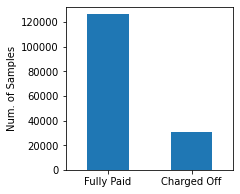

In [26]:
check_portion(df, 'loan_status', figsize=(3,3), rot=0)

## Add New Features 

**Credit lineage**  
It is one of the factors to calculate the FICO SCORE. In other words, it is used to calculate the credit risk. We can obtain it by calculating the month difference between `issue_d` and `earliest_cr_line`.

In [27]:
# add 'cr_lineage' column
df['cr_lineage'] = round((df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'M'))

**Is Fully Paid?**

We will give 'Fully Paid' loans a value of 1 and 'Charged' loans a value of 0. This column will be our label / target feature when we are training our machine learning models. Even though we have already had the `loan_status` column, we will not us it for training our machine learning models. We will only use it for plot labeling in exploratory data analysis step.

In [28]:
# replacing dictionary
dict_replacing = {
    'Fully Paid': 1, 
    'Charged Off': 0,
}

# update column
df['is_fully_paid'] = df['loan_status'].map(dict_replacing)

## Reset Index

The last thing before we carry out further analyses is we need to reset our dataframe's index. Just to ensure we will not encounter any unnecessary future errors.

In [29]:
df.reset_index(drop=True, inplace=True)

## The Data

At this point, we have prepared our data and we end up with this dataset. 

In [30]:
df

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,issue_d,loan_status,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,le_term,le_grade,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose,home_ownership,verification_status,le_emp_length,cr_lineage,is_fully_paid
0,12000,36 months,13.53,B,10+ years,40000.0,2013-12-01,Fully Paid,871,NM,16.94,0.0,1998-10-01,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0.0,53.0,0.0,15386.0,13605.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,debt_consolidation,RENT,Source Verified,10.0,182.0,1
1,3000,36 months,12.85,B,10+ years,25000.0,2013-12-01,Fully Paid,322,FL,24.68,0.0,1991-05-01,0.0,58.0,53.0,5.0,2.0,2875,54.2,26.0,0.0,69.0,0.0,154.0,19530.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,debt_consolidation,RENT,Verified,10.0,271.0,1
2,28000,36 months,7.62,A,5 years,325000.0,2013-12-01,Fully Paid,945,CA,18.55,0.0,1994-11-01,1.0,152.0,121.0,15.0,0.0,29581,54.6,31.0,0.0,154.0,0.0,0.0,799592.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,debt_consolidation,MORTGAGE,Source Verified,5.0,229.0,1
3,24000,36 months,13.53,B,10+ years,100000.0,2013-12-01,Fully Paid,493,MI,22.18,0.0,1989-01-01,0.0,152.0,121.0,14.0,0.0,21617,76.7,39.0,0.0,154.0,0.0,539.0,199834.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,credit_card,MORTGAGE,Verified,10.0,299.0,1
4,15000,36 months,14.47,C,10+ years,98000.0,2013-12-01,Fully Paid,117,NY,6.15,0.0,1992-07-01,2.0,152.0,121.0,16.0,0.0,5749,22.3,16.0,0.0,154.0,0.0,0.0,13038.0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,debt_consolidation,RENT,Not Verified,10.0,257.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156650,8525,60 months,18.25,D,5 years,37536.0,2014-01-01,Charged Off,011,MA,12.28,4.0,1994-11-01,0.0,3.0,121.0,12.0,0.0,5318,10.7,26.0,0.0,4.0,0.0,0.0,116995.0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,medical,MORTGAGE,Verified,5.0,230.0,0
156651,18000,36 months,7.90,A,3 years,90000.0,2014-01-01,Charged Off,212,MD,10.33,1.0,1998-07-01,0.0,14.0,121.0,16.0,0.0,8224,16.3,33.0,0.0,14.0,0.0,0.0,42592.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,debt_consolidation,RENT,Verified,3.0,186.0,0
156652,10000,36 months,18.25,D,10+ years,42000.0,2014-01-01,Fully Paid,201,VA,11.57,0.0,2002-06-01,0.0,29.0,121.0,9.0,0.0,3196,28.8,24.0,0.0,32.0,0.0,0.0,10170.0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,vacation,RENT,Source Verified,10.0,139.0,1
156653,22000,60 months,19.97,D,10+ years,78000.0,2014-01-01,Charged Off,377,TN,18.45,0.0,1997-06-01,5.0,152.0,116.0,18.0,1.0,18238,46.3,30.0,0.0,154.0,0.0,0.0,221830.0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,debt_consolidation,MORTGAGE,Verified,10.0,199.0,0


We currently have 156,655 rows and 54 columns. Even though we preserved all the original columns, all of them will not be used for building models since we have encoded them. They will come in handy when it comes to EDA visualization. Yet, for building machine learning models, we will exclude them. 

In [31]:
# non-machine learning columns (will not be used when building machine learning models)
cols_nonml = ['issue_d', 'loan_status', 'zip_code', 'addr_state', 'earliest_cr_line', 'purpose', 'home_ownership', 'verification_status', 'term', 'grade', 'emp_length']
target = 'is_fully_paid'

# machine learning dataframe
df_ml = df.drop(cols_nonml, axis=1)
df_ml

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,le_term,le_grade,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,le_emp_length,cr_lineage,is_fully_paid
0,12000,13.53,40000.0,16.94,0.0,0.0,53.0,33.0,7.0,2.0,5572,68.8,32.0,0.0,53.0,0.0,15386.0,13605.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,10.0,182.0,1
1,3000,12.85,25000.0,24.68,0.0,0.0,58.0,53.0,5.0,2.0,2875,54.2,26.0,0.0,69.0,0.0,154.0,19530.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,10.0,271.0,1
2,28000,7.62,325000.0,18.55,0.0,1.0,152.0,121.0,15.0,0.0,29581,54.6,31.0,0.0,154.0,0.0,0.0,799592.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5.0,229.0,1
3,24000,13.53,100000.0,22.18,0.0,0.0,152.0,121.0,14.0,0.0,21617,76.7,39.0,0.0,154.0,0.0,539.0,199834.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,10.0,299.0,1
4,15000,14.47,98000.0,6.15,0.0,2.0,152.0,121.0,16.0,0.0,5749,22.3,16.0,0.0,154.0,0.0,0.0,13038.0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.0,257.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156650,8525,18.25,37536.0,12.28,4.0,0.0,3.0,121.0,12.0,0.0,5318,10.7,26.0,0.0,4.0,0.0,0.0,116995.0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,5.0,230.0,0
156651,18000,7.90,90000.0,10.33,1.0,0.0,14.0,121.0,16.0,0.0,8224,16.3,33.0,0.0,14.0,0.0,0.0,42592.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,186.0,0
156652,10000,18.25,42000.0,11.57,0.0,0.0,29.0,121.0,9.0,0.0,3196,28.8,24.0,0.0,32.0,0.0,0.0,10170.0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,10.0,139.0,1
156653,22000,19.97,78000.0,18.45,0.0,5.0,152.0,116.0,18.0,1.0,18238,46.3,30.0,0.0,154.0,0.0,0.0,221830.0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,10.0,199.0,0


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is one of the methods that is used to get to know our data. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. Understanding our dataset is critical when we want to model it or to perform further analysis. Several benefits of EDA are as follows:
- to get a better understanding about a dataset
- to know the characteristics of the dataset
- to help make predictions and assumptions about the data
- to find the patterns of the dataset as well as to catch mistakes / anomalies
- to find any relationships in a dataset

Univariate and multivariate analysis are oftentimes used when it comes to performing EDA.   
> **- Univariate Analysis**  
> Univariate analysis means an analysis performed on only a single variable. It's worth noting that the terms "feature", "variable" and "column" can be used interchangeably. Univariate analysis can be done by showing the distribution of a variable by either a histogram / KDE plot as well as a box plot.   
> **- Multivariate Analysis**  
> Different with the previous step, here we compare two or more features to get the relationship between them. Hence, we can determine if one variable affects another variable.

Let's explore!

## Loan Grade vs. Loan Status

From the plot below, we can tell that the majority of loans are graded B by the LC. The grade G has the smallest number of loans. Looking at this plot, we are not able to see clearly which grade is riskier than the others.

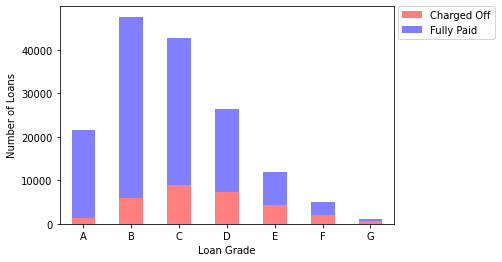

In [32]:
df_temp = pd.pivot_table(df, index='grade', columns='loan_status', margins=True, aggfunc='count')
df_temp = pd.DataFrame(df_temp.iloc[:-1, 0:2].values, columns=['Charged Off', 'Fully Paid'], index=df_temp.index[:-1])

# plot
fig, ax = plt.subplots()
df_temp.plot(kind='bar', stacked=True, ylabel='Number of Loans', xlabel='Loan Grade', ax=ax, color=['red', 'blue'], alpha=.5, rot=0)
ax.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)

However, if we calculate the portion of each loan status for each grade, we will end up with the plot below. It tells us that the higher the grade, the riskier the loan. It is clearly shown that the portion of the charged off loans increases from grade A to G. On the other hand, the portion of the fully paid loans decreases from grade A to G. 

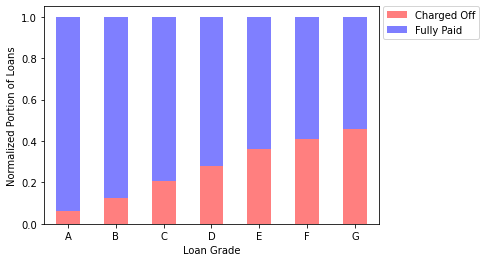

In [33]:
plot_loan_portion(df, 'grade', 'Loan Grade', rot=0)

## Interest Rate for Fully-Paid vs. Charged Off Loans
The plots below show us that, on average, loans that end up being charged off have higher interest rate than the fully paid loans. Moreover, we can see that 75% of the fully paid loans have interest rate of less than 16.29%. Meanwhile, 50% of the charged off loans have interest rate of more than 16.29%.  

In [34]:
pd.DataFrame(df.groupby('loan_status').mean()['int_rate'])

,int_rate
loan_status,
Charged Off,16.536
Fully Paid,13.793


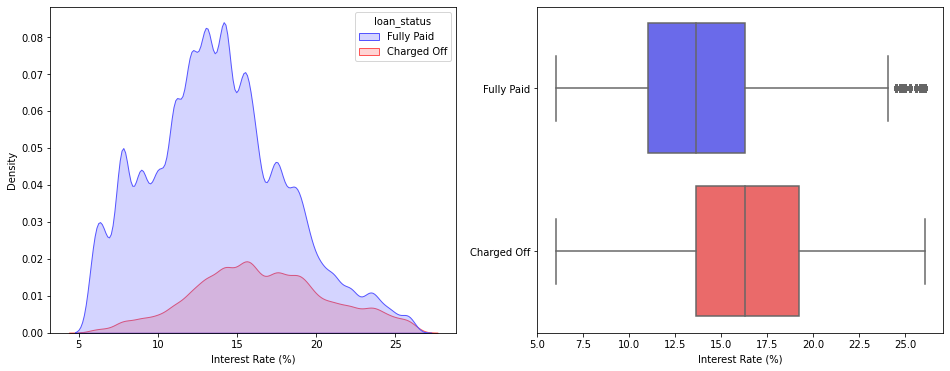

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.kdeplot(data=df, x='int_rate', hue='loan_status', shade=True, ax=axes[0], palette='seismic')
axes[0].set(xlabel='Interest Rate (%)')

sns.boxplot(data=df, x='int_rate', y='loan_status', ax=axes[1], palette='seismic')
axes[1].set(ylabel='', xlabel='Interest Rate (%)')

fig.show()

## Mean of Interest Rate by Grade

On average, the higher the grade, the higher the interest rate. Keep in mind that the higher the grade means the riskier the loan. Moreover, the interest rate by loan status plot illustrates that charged off loans have higher interest rate. Thus, if we lended money with high interest rate, the borrowers might not pay the loans. Of course it makes sense since the higher the insterest rate, the more difficult it is to pay the loan.

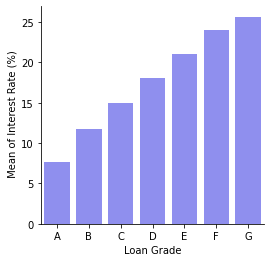

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
df_plot = pd.DataFrame(df.groupby('grade').mean()['int_rate']).T
sns.barplot(data=df_plot, color='blue', alpha=.5, ax=ax)
ax.set(xlabel='Loan Grade', ylabel=' Mean of Interest Rate (%)')
sns.despine()
fig.show()

## Debt to Income Ratio for Fully-Paid vs. Charged Off Loans
The plot below tells us that, on average, the borrowers who end up don't pay their loans have higher debt-to-income ratio.

In [37]:
pd.DataFrame(df.groupby('loan_status').mean()['dti'])

,dti
loan_status,
Charged Off,19.083
Fully Paid,16.665


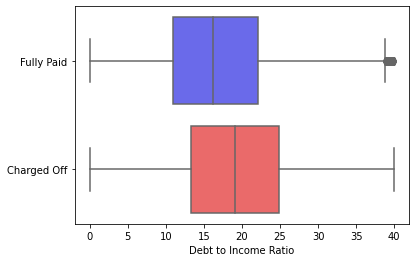

In [38]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='dti', y='loan_status', ax=ax, palette='seismic')
ax.set(ylabel='', xlabel='Debt to Income Ratio')
fig.show()

## What are the Borrowers' Purposes of Borrowing Money?

Here we can tell that the top 3 purposes of the borrowers are debt consolidation, credit card debt, and home improvement.

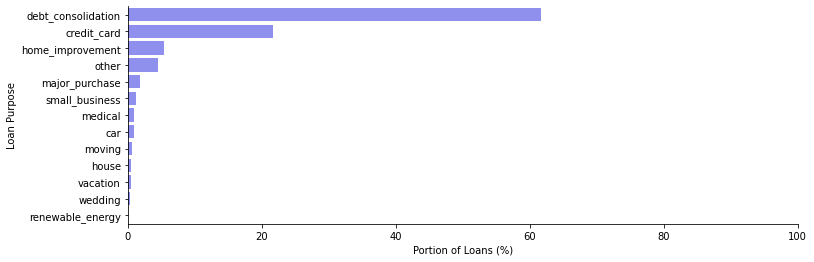

In [39]:
fig, ax = plt.subplots(figsize=(12,4))
df_plot = pd.DataFrame(df['purpose'].value_counts()/df.shape[0]*100).T
sns.barplot(data=df_plot, color='blue', orient='h', alpha=.5, ax=ax)
ax.set(xlabel='Portion of Loans (%)', ylabel='Loan Purpose', xlim=[0, 100])
sns.despine()
fig.show()

It's going to be interesting if we calculate the portion of each loan status for each purpose. The plot below tells us exactly that. It clearly tells us that the top 3 riskiest purposes are small business, moving, and "other" categories. The quotation marks are needed to ensure the readers that we have a category named other in the purpose column. So, the top 3 purposes in terms of the number of loans turn out to be not the top 3 riskiest loans. In addition, borrowers who borrow money to buy their cars tend to pay their loans.

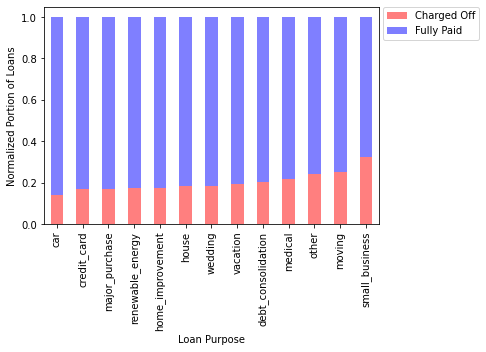

In [40]:
plot_loan_portion(df, 'purpose', 'Loan Purpose', rot=90)

## Loan Term vs. Loan Status

It is clear that the longer the loan term, the riskier the loan will be.

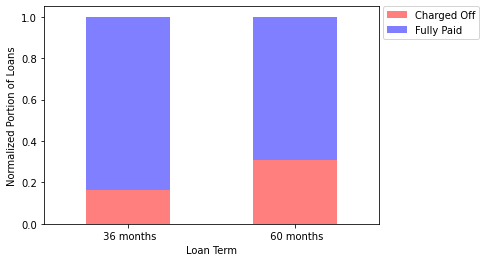

In [41]:
plot_loan_portion(df, 'term', 'Loan Term', rot=0)

# Modeling 

It's time to create machine learning models! To predict the credit risk, we chose to use tree-based machine learning models. Why? because they are considered to be one of the best and mostly used supervised learning models. What's more, the interpretability is relatively high compared to other models, so we can easily extract the feature importances. Not to mention that we don't need to bother to rescale (normalize / standardize) our features since tree-based models use a series of if-then rules to generate predictions from one or more decision trees.

## Train-Test Splitting

First thing first, we need to split the data into train dataset (80%) and test dataset (20%). Keep in mind that we have a moderately imbalanced dataset. We certainy want to avoid having the train dataset with 100% fully paid loans and having the test dataset with 100% of charged off loans. Thus, we must ensure that the proportion of the loan status in the train as well as in the test datasets are the same. The scikit-learn's `stratify` argument in the `train_test_split` method will help us do that. 

In [42]:
# train-test split
df_train, df_test = train_test_split(df_ml, test_size=.2, stratify=df_ml[target], random_state=11)
X_train, y_train = df_train.drop(target, axis=1), df_train[[target]]
X_test, y_test = df_test.drop(target, axis=1), df_test[[target]]

## Trivial Model

Before we make some machine learning models, sometimes it is good to have a trivial model as a comparison. Here, we just simply predict all loans in the training and test datasets as fully paid loans (the majority of the class). Then, we will calculate the model performance metrics.

True Positives	:  25223
True Negatives	:  0
False Positives	:  6108
False Negatives	:  0


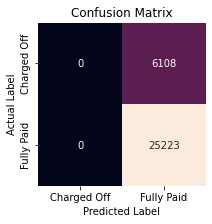

In [43]:
# "predicted" values
y_trivial_train = np.array([1]*df_train.shape[0]) 
y_trivial_test = np.array([1]*df_test.shape[0])

# confusion matrix (test set)
cm = confusion_matrix(y_test, y_trivial_test)
plot_cm(cm)

With this trivial model, we only have true positives and false positives. Hence, the accuracy and the precision score will be the same. Yet, it's different with the recall and balanced accuracy scores. Let's calculate those scores!

In [44]:
# metric scores (test set)
accuracy = accuracy_score(y_test, y_trivial_test)
precision = precision_score(y_test, y_trivial_test)
recall = recall_score(y_test, y_trivial_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_trivial_test)

print('Metric scores for our trivial model (test set):') 
print(f'- Accuracy\t\t: {round(accuracy*100,2)}%')
print(f'- Precision\t\t: {round(precision*100,2)}%')
print(f'- Recall\t\t: {round(recall*100,2)}%')
print(f'- Balanced accuracy\t: {round(balanced_accuracy*100,2)}%')

Metric scores for our trivial model (test set):
- Accuracy		: 80.5%
- Precision		: 80.5%
- Recall		: 100.0%
- Balanced accuracy	: 50.0%


The accuracy score is high. But, it is not a good metric to use when we are dealing with imbalanced dataset. On the other hand, if we stick to the recall score, our trivial model is already perfect. So, we don't need to waste our time going further. However, since we predicted all loans as fully paid, it is not surprising to get the recall score of 100%. That's because the recall tells us the portion of the predicted fully paid loans out of the total actual fully paid loans. The problem is, it doesn't take into account the amount of false positives, i.e. the loans that are predicted as fully paid but actually charged off. Thus, to measure how good our model is, we will use the precision score since we want to consider the false positives. In addition to precision score, we will also consider balanced accuracy metric since it is the average of recall (true positive rate) and specificity (true negative rate). The balanced accuracy score gives us a better idea of how well the model is able to predict both classes. Moreover, it is useful for measuring predictions in imbalanced dataset.  

Before we create models, creating a dataframe to record all models' metric scores will be useful. The dataframe will be used to compare the performance of all models and will come in handy when it comes to determining the best model.

In [45]:
# initiate a dataframe of metric scores
metrics = ['Train Precision', 'Train Bal. Accuracy', 'Test Precision', 'Test Bal. Accuracy']
df_scores = pd.DataFrame(columns=['Model']+metrics)

# append trivial model's scores to the dataframe
trivial_scores = get_scores(y_train, y_trivial_train, y_test, y_trivial_test)
df_scores = append_scores(df_scores, model_name='Trivial', scores=trivial_scores)
df_scores

,Model,Train Precision,Train Bal. Accuracy,Test Precision,Test Bal. Accuracy
0,Trivial,0.805,0.5,0.805,0.5


## Baseline Model

We chose to build a simple decision tree model as our baseline model. The default parameters will be used. 

In [46]:
# build decision tree model
baseline = tree.DecisionTreeClassifier(max_depth=None, class_weight=None, random_state=11)
baseline.fit(X_train, y_train)

# append baseline model's scores to the scores dataframe
baseline_scores = evaluate_model(baseline, X_train, y_train, X_test, y_test)
df_scores = append_scores(df_scores, model_name='Baseline', scores=baseline_scores)

df_scores

,Model,Train Precision,Train Bal. Accuracy,Test Precision,Test Bal. Accuracy
0,Trivial,0.805,0.5,0.805,0.5
1,Baseline,1.0,1.0,0.825,0.549


As we can see, the baseline model has a slightly better performance. But, we need to be careful. The baseline model predicted the train dataset without a single mistake. Also there is a difference between the train and test scores. Thus, it indicates an overfitting issue. There are ways to avoid overfitting. One of them is to tune the hyperparameters. Let's try to adjust the hyperparameters of the decision tree model.

## Decision Tree Models

**Class Weighting**  
Since we are dealing with an imbalanced dataset, giving each class a weight would increase our model performance. Going forward, the weights below will be used. In addition, we will try other combinations of weights for comparison when we are tuning the hyperparameters.

In [47]:
# label distribution (train set)
pos = np.count_nonzero(y_train)
neg = len(y_train) - pos
total = neg + pos

# class weightings
weight_for_0 = round((1/neg)*total/2.0, 2)
weight_for_1 = round((1/pos)*total/2.0, 2)

class_weight = [{0: weight_for_0, 1: weight_for_1}]

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 2.56
Weight for class 1: 0.62


In [48]:
# build decision tree model
tree_1 = tree.DecisionTreeClassifier(max_depth=None, class_weight=class_weight[0], random_state=11)
tree_1.fit(X_train, y_train)

# append scores to the scores dataframe
tree_1_scores = evaluate_model(tree_1, X_train, y_train, X_test, y_test)
df_scores = append_scores(df_scores, model_name='Decision Tree 1', scores=tree_1_scores)
df_scores

,Model,Train Precision,Train Bal. Accuracy,Test Precision,Test Bal. Accuracy
0,Trivial,0.805,0.5,0.805,0.5
1,Baseline,1.0,1.0,0.825,0.549
2,Decision Tree 1,1.0,1.0,0.82,0.538


Unfortunately, our new model, Decision Tree 1, has a similar performance to our baseline model. Next, we will try to play with the `max_depth` and `class_weight` parameters using Grid Search K-fold CV algorithm.   

**Grid Search (Stratified) K-Fold Cross Validation**

The scikit-learn's `GridSearchCV` method will help us determining the best hyperparameters for our models. Basically, it does two things:
1. Apply a grid search to an array of hyperparameters
2. Cross-validate our model using k-fold cross validation

Since we are dealing with an imbalanced dataset, we need a stratified k-fold cross validation algorithm instead of the standard k-fold cross validation. Fortunately, `GridSearchCV` method provides it. Quoted from the scikit-klearn documentation, "for integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used.".   
Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [49]:
# set up the hyperparameters
depths = np.arange(1,21)
weights = class_weight+['balanced', {0:3, 1:1}, {0:4, 1:1}, {0:5, 1:1}]
parameters = [{'max_depth': depths, 'class_weight': weights}]

# grid search (stratified) K-fold cross validation
grid_search = GridSearchCV(estimator=baseline, param_grid=parameters, scoring='precision', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid=[{'class_weight': [{0: 2.56, 1: 0.62}, 'balanced',
                                           {0: 3, 1: 1}, {0: 4, 1: 1},
                                           {0: 5, 1: 1}],
                          'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}],
             scoring='precision')

In [50]:
# display the top 5 scores
grid_search_results = pd.DataFrame(grid_search.cv_results_['params'])
grid_search_results['mean_test_score'] =  grid_search.cv_results_['mean_test_score']
display(grid_search_results.sort_values('mean_test_score', ascending=False).head(5))

# best parameters
best_parameters = grid_search.best_params_

,class_weight,max_depth,mean_test_score
82,"{0: 5, 1: 1}",3,0.900
85,"{0: 5, 1: 1}",6,0.898
84,"{0: 5, 1: 1}",5,0.896
86,"{0: 5, 1: 1}",7,0.894
83,"{0: 5, 1: 1}",4,0.893


Based on the GridSearchCV results, the best max_depth is 3, while the best class weight is {0:5, 1:1}. Yet, the second best also has the similar mean test score and it has higher `max_depth`. It means, the second best involves more features than the first does. Furthermore, it will be important when we determine the feature importances. Therefore, let's train the model with the second best parameters and evaluate it using the test dataset. 

In [51]:
# build decision tree model
tree_2 = tree.DecisionTreeClassifier(max_depth=6, class_weight=best_parameters['class_weight'], random_state=11)
tree_2.fit(X_train, y_train)

# append scores to the scores dataframe
tree_2_scores = evaluate_model(tree_2, X_train, y_train, X_test, y_test)
df_scores = append_scores(df_scores, model_name='Decision Tree 2', scores=tree_2_scores)
df_scores

,Model,Train Precision,Train Bal. Accuracy,Test Precision,Test Bal. Accuracy
0,Trivial,0.805,0.5,0.805,0.5
1,Baseline,1.0,1.0,0.825,0.549
2,Decision Tree 1,1.0,1.0,0.82,0.538
3,Decision Tree 2,0.901,0.641,0.895,0.632


Our new model has a precision of 90.1%. It means that there is quite big improvement in the model performance. Not to mention the new balanced accuracy score of 63.2%.

## Random Forest Models

**Class Weighting**  

In [52]:
# build random forest model
rf_1 = RandomForestClassifier(max_depth=None, class_weight=class_weight[0], random_state=11)
rf_1.fit(X_train, y_train)

# append scores to the scores dataframe
rf_1_scores = evaluate_model(rf_1, X_train, y_train, X_test, y_test)
df_scores = append_scores(df_scores, model_name='Random Forest 1', scores=rf_1_scores)
df_scores

,Model,Train Precision,Train Bal. Accuracy,Test Precision,Test Bal. Accuracy
0,Trivial,0.805,0.5,0.805,0.5
1,Baseline,1.0,1.0,0.825,0.549
2,Decision Tree 1,1.0,1.0,0.82,0.538
3,Decision Tree 2,0.901,0.641,0.895,0.632
4,Random Forest 1,1.0,1.0,0.809,0.514


The random forest model predicted the train dataset without a single mistake. Also there is a difference between the train and test scores. Thus, it indicates an overfitting issue. Let's try to tune the hyperparameters.

**Grid Search (Stratified) K-Fold Cross Validation**

In [53]:
# set up the hyperparameters
parameters = [{'max_depth': depths, 'class_weight': weights}]

# grid search (stratified) K-fold cross validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=11), param_grid=parameters, scoring='precision', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11), n_jobs=-1,
             param_grid=[{'class_weight': [{0: 2.56, 1: 0.62}, 'balanced',
                                           {0: 3, 1: 1}, {0: 4, 1: 1},
                                           {0: 5, 1: 1}],
                          'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}],
             scoring='precision')

In [54]:
# display the top 5 scores
grid_search_results = pd.DataFrame(grid_search.cv_results_['params'])
grid_search_results['mean_test_score'] =  grid_search.cv_results_['mean_test_score']
display(grid_search_results.sort_values('mean_test_score', ascending=False).head(5))

# best parameters
best_parameters = grid_search.best_params_

,class_weight,max_depth,mean_test_score
80,"{0: 5, 1: 1}",1,0.921
86,"{0: 5, 1: 1}",7,0.900
84,"{0: 5, 1: 1}",5,0.899
85,"{0: 5, 1: 1}",6,0.899
83,"{0: 5, 1: 1}",4,0.898


For the same reason, let's train the model with the second best parameters and evaluate it using the test dataset. 

In [55]:
# build random forest model
rf_2 = RandomForestClassifier(max_depth=7, 
                                  class_weight=best_parameters['class_weight'], 
                                  random_state=11)
rf_2.fit(X_train, y_train)

# append scores to the scores dataframe
rf_2_scores = evaluate_model(rf_2, X_train, y_train, X_test, y_test)
df_scores = append_scores(df_scores, model_name='Random Forest 2', scores=rf_2_scores)
df_scores

,Model,Train Precision,Train Bal. Accuracy,Test Precision,Test Bal. Accuracy
0,Trivial,0.805,0.5,0.805,0.5
1,Baseline,1.0,1.0,0.825,0.549
2,Decision Tree 1,1.0,1.0,0.82,0.538
3,Decision Tree 2,0.901,0.641,0.895,0.632
4,Random Forest 1,1.0,1.0,0.809,0.514
5,Random Forest 2,0.904,0.649,0.901,0.643


"The newer the better" phrase is true for now! Although the scores are similar to the Decision Tree 2's scores, there are slight improvements on the precision as well as the balanced accuracy scores. However, we can observe that the balanced accuracy score is not that high. To know the reason behind that, let's take a look at our best model's confusion matrix!

True Positives	:  13118
True Negatives	:  4674
False Positives	:  1434
False Negatives	:  12105


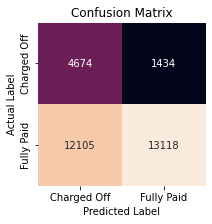

In [56]:
plot_cm(rf_2_scores['Test CM'])

Even though we have a high precision score, we still have many false negatives. These false negatives are responsible for the low balanced accuracy score. However, in our case now, it's more acceptable to have low false positives and have high false negatives rather than the other way around. In other words, it is more acceptable to mistakenly predict fully paid loans as charged off loans rather than to mistakenly predict the charged off loans as fully paid loans.

As of now, we have chosen our best model and still need to answer one of the most asked questions, namely, which features are important and which are not when it comes to making predictions? To answer that question, let's extract the feature importances. The ease of extracting the feature importances is one of the advantages of the tree-based models. Here is the list of the top 10 most important features.

In [57]:
# Get feature importance
importances = pd.DataFrame({'Columns':X_train.columns,'Feature_Importances':rf_2.feature_importances_})
importances = importances.sort_values(by='Feature_Importances', ascending=False)
importances.head(15)

,Columns,Feature_Importances
1,int_rate,0.320
19,le_grade,0.240
18,le_term,0.105
3,dti,0.078
2,annual_inc,0.071
17,tot_cur_bal,0.030
0,loan_amnt,0.029
11,revol_util,0.024
10,revol_bal,0.012
41,cr_lineage,0.011


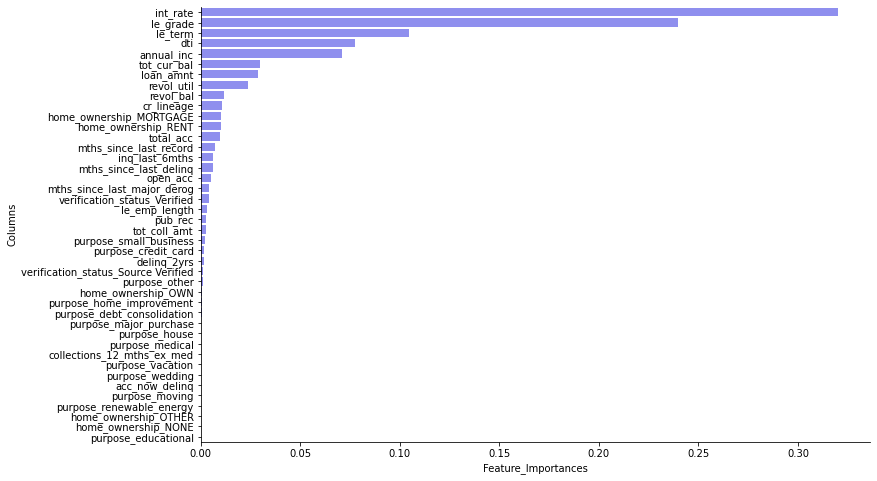

In [58]:
# plot the feature importances
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=importances['Feature_Importances'], y=importances['Columns'], color='blue', alpha=.5, ax=ax)
sns.despine()

It seems that the interest rate, loan grade, loan term, debt to income ratio, and annual income columns play big roles when it comes to predicting whether new loans would end up being fully paid or charged off. 

# Summary and Conclusions

We have done several things to prepare our data; dropping unnecessary samples, selecting relevant features, fixing bad-formatted features, performing data imputation to fill up null values, and adding new features. All of that just to ensure that our data is suitable and usable for building machine learning models.   

We have also performed EDA and gained some insights out of our dataset. We found that, on average, loans that end up being charged off have higher interest rate than the fully paid loans. The borrowers might not completely pay the loans if we lended money with high interest rate. Moreover, on average, the borrowers who ended up didn't pay their loans have higher debt-to-income ratio. What's more, it is clear that the longer the loan term, the riskier the loan will be. On top of that, we found that it's the riskiest to lend money to borrowers who want to use it for their small businesses.

To predict the credit risk, we have built some machine learning models. We have also compared all the models and we ended up with the Random Forest 2 model as our best model. From our best model, we can tell that the interest rate, loan grade, loan term, debt to income ratio, and annual income columns play big roles when it comes to making predictions. In addition to that, our model has a precision score of 90.1% and a balanced accuracy socre of 64.3% on the test dataset. However, even though we have a high precision score, we still have many false negatives. These false negatives are responsible for the low balanced accuracy score. It means that, on one hand, our model is good enough to predict fully paid loans, but is not good enough to predict the charged off loans correctly. But, it is more acceptable to mistakenly predict fully paid loans as charged off loans rather than to mistakenly predict the charged off loans as fully paid loans. We can try these things to improve our model performance, especially to improve balanced accuracy score by:

- Changing the category of target feature. We chose only fully paid loans and charged off loans as our positive and negative outcomes, respectively. We could consider other loan status categories to be involved.  
- Do more and more feature engineering
- Try different hyperparameter combinations or even different models and compare them.
- etc.

There is still a big room for improvement and that's what science is all about. It is an iterative process that requires experimentation and testing to find the best combination of features, parameters, and models for a given problem.

With that being said and done, we hope this notebook can be beneficial to the readers. We realize that it is not perfect. So, corrections and constructive comments are highly appreciated! Thanks for reading!

**REFERENCE(S):**

Some excellent sources of information:  
- https://daniellecrumley.github.io/LendingClubProject/
- https://blog.dataiku.com/tree-based-models-how-they-work-in-plain-english#:~:text=We%E2%80%99ll%20explore%20three%20types%20of%20tree-based%20models%3A%201,%E2%80%9Censemble%E2%80%9D%20method%20which%20builds%20many%20decision%20trees%20sequentially.
- https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/#:~:text=Tree%20based%20algorithms%20empower%20predictive%20models%20with%20high,kind%20of%20problem%20at%20hand%20%28classification%20or%20regression%29.
- https://www.statology.org/balanced-accuracy/
- https://datagy.io/sklearn-gridsearchcv/